In [1]:
from ota_op import template_generator
import subprocess
from gmid.mosplot.parsers.ngspice_parser import NgspiceRawFileReader
from ldo_small_signal_modeling import small_signal_macromodel, small_signal_device
from symbolic_mna import symbolic_mna
from sympy import *
import numpy as np
from utils import *

In [2]:
ota_name = "OTA1st_lvt_jm"
ota_netlist_path = "ldo_xschem/OTA1st_lvt_jm.spice"
netlist_output = "./ldo_xschem/OTA_op_netlist.spice"
op_output_data = "op_data"

template = template_generator(ota_name=ota_name,
                              output_file_path=op_output_data,
                              model_paths=[".lib /home/jovyan/.volare/sky130A/libs.tech/ngspice/sky130.lib.spice tt"],
                              device_params_instantiation_model= "m{device_model}",
                              simulation_circuit = ["V1 V3V3 GND 1.8", 
                                                    "I0 GND net1 1.5u", 
                                                    "V2 net2 GND {CM_VOLTAGE}", 
                                                    "V3 INP net2 AC 1", 
                                                    "C1 OUT GND 1f m=1", 
                                                    "R1 net3 INM 10E6 m=1", 
                                                    "V4 OUT net3 {OUTPUT_VOLTAGE-CM_VOLTAGE}", 
                                                    "C2 INM GND 1 m=1"],
                              subckt_instantation = "x1 INP INM OUT V3V3 GND net1 {subckt}",
                              ota_netlist_path=ota_netlist_path,
                              netlist_output=netlist_output)

In [3]:
template.build()

subck
---------------------------------------------------
----- This is the netlist that gets simulated -----
---------------------------------------------------
* Lookup Table Generation *
.lib /home/jovyan/.volare/sky130A/libs.tech/ngspice/sky130.lib.spice tt
V1 V3V3 GND 1.8
I0 GND net1 1.5u
V2 net2 GND {CM_VOLTAGE}
V3 INP net2 AC 1
C1 OUT GND 1f m=1
R1 net3 INM 10E6 m=1
V4 OUT net3 {OUTPUT_VOLTAGE-CM_VOLTAGE}
C2 INM GND 1 m=1
x1 INP INM OUT V3V3 GND net1 OTA1st_lvt_jm

.options TEMP = 27
.options TNOM = 27
.param CM_VOLTAGE = 0.8
.param OUTPUT_VOLTAGE = 0.7
.control
save @m.x1.xm1.msky130_fd_pr__nfet_01v8_lvt[gm]
save @m.x1.xm1.msky130_fd_pr__nfet_01v8_lvt[gds]
save @m.x1.xm1.msky130_fd_pr__nfet_01v8_lvt[cgs]
save @m.x1.xm1.msky130_fd_pr__nfet_01v8_lvt[cgd]
save @m.x1.xm2.msky130_fd_pr__nfet_01v8_lvt[gm]
save @m.x1.xm2.msky130_fd_pr__nfet_01v8_lvt[gds]
save @m.x1.xm2.msky130_fd_pr__nfet_01v8_lvt[cgs]
save @m.x1.xm2.msky130_fd_pr__nfet_01v8_lvt[cgd]
save @m.x1.xm3.msky130_fd_pr__pfet

In [4]:
print(f"run ngspice")
ngspice_command = f"ngspice -b {template.netlist_output}"
subprocess.run(ngspice_command, shell=True)

run ngspice

Note: No compatibility mode selected!


Circuit: * lookup table generation *

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

 Reference value :  1.00000e+01
No. of Data Rows : 1601
 meas ac phase_margin find phase_margin_val when vdb(out)=0 failed!

crossover_freq      =  0.000000e+00
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
binary raw file "op_data"
Note: Simulation executed from .control section 


Note: v3: has no value, DC 0 assumed
    Command 'settype decibel out' is ignored

Warning from checkvalid: vector out is not available or has zero length.
Error: RHS "180/pi*cph(out)" invalid
    Command 'settype phase phase_val' is ignored

Error: no such vector as v(out).
Error: no such vector as phase_margin_val.
Error: no such vector as v(out).
Note: v3: has no value, DC 0 assumed


CompletedProcess(args='ngspice -b ./ldo_xschem/OTA_op_netlist.spice', returncode=0)

In [5]:
op_data = op_parser(template)
op_data

{'gm_xm1': array([1.34130703e-05]),
 'gds_xm1': array([1.16707417e-07]),
 'cgs_xm1': array([-1.69517609e-15]),
 'cgd_xm1': array([-2.09156138e-19]),
 'gm_xm2': array([1.51391293e-05]),
 'gds_xm2': array([1.65787021e-07]),
 'cgs_xm2': array([-1.73671822e-15]),
 'cgd_xm2': array([-3.31462051e-18]),
 'gm_xm3': array([6.77525533e-06]),
 'gds_xm3': array([1.85953178e-07]),
 'cgs_xm3': array([-2.31009071e-15]),
 'cgd_xm3': array([-9.63837632e-19]),
 'gm_xm4': array([7.4272809e-06]),
 'gds_xm4': array([1.54252802e-07]),
 'cgs_xm4': array([-2.30871329e-15]),
 'cgd_xm4': array([-1.04354769e-19]),
 'gm_xm7': array([1.53939703e-05]),
 'gds_xm7': array([5.32698715e-07]),
 'cgs_xm7': array([-2.09444685e-15]),
 'cgd_xm7': array([-1.45773827e-16]),
 'gm_xm8': array([1.64955735e-05]),
 'gds_xm8': array([1.97775487e-07]),
 'cgs_xm8': array([-2.128657e-15]),
 'cgd_xm8': array([-2.72376501e-18])}

In [9]:
nodes, in_pos_node, next_node = node_identification(template)
ldo_output_node = next_node
nodes

{'Vas': 3,
 'Vsrc': 4,
 'IN_M': 0,
 'OUT': 2,
 'IN_P': 5,
 'VDD': 1,
 'VSS': 0,
 'ibias': 6}

In [11]:
macromodel = small_signal_macromodel(macromodel_file_path = "ldo_xschem/ldo_macromodel.spice")
small_signal_devices = macromodel.build(template, op_data, nodes)

f = open(macromodel.macromodel_file_path, "a")
f.write(f"Vdd {nodes['VDD']} {nodes['VSS']} 1\n")
pass_tranistor = small_signal_device(name="pt", 
                                                gds=1, 
                                                gm=1,
                                                cgs=1, 
                                                cgd=1, 
                                                vs=nodes["VDD"], vd=ldo_output_node, vg=nodes["OUT"])
print("\n".join(pass_tranistor.get_model_spice()))
f.write("\n".join(pass_tranistor.get_model_spice()))
f.write(f"\nR1 {nodes['IN_P']} {ldo_output_node} 100000\n")
f.write(f"R2 0 {nodes['IN_P']} 200000\n")
f.write(f"C_load 7 0 1e-16\n")
f.close()

f = open(macromodel.macromodel_file_path, "r")
print(f.read())
f.close()

Gm_pt 7 1 2 1 1
Rds_pt 1 7 1.0
Cgs_pt 2 1 1
Cgd_pt 2 7 1
Gm_xm1 3 4 0 4 1.3413070299711695e-05
Rds_xm1 4 3 8568435.737965574
Cgs_xm1 0 4 -1.69517608883279e-15
Cgd_xm1 0 3 -2.0915613846689759e-19Gm_xm2 2 4 5 4 1.5139129255702037e-05
Rds_xm2 4 2 6031835.251465722
Cgs_xm2 5 4 -1.7367182157546796e-15
Cgd_xm2 5 2 -3.314620507151756e-18Gm_xm3 3 1 3 1 6.775255331010954e-06
Rds_xm3 1 3 5377697.834649536
Cgs_xm3 3 1 -2.3100907082351055e-15
Cgd_xm3 3 3 -9.638376317674102e-19Gm_xm4 2 1 3 1 7.427280897697451e-06
Rds_xm4 1 2 6482864.41107985
Cgs_xm4 3 1 -2.3087132882054998e-15
Cgd_xm4 3 2 -1.0435476894357876e-19Gm_xm7 4 0 6 0 1.539397029243748e-05
Rds_xm7 0 4 1877233.7391281745
Cgs_xm7 6 0 -2.0944468490866743e-15
Cgd_xm7 6 4 -1.4577382730560838e-16Gm_xm8 6 0 6 0 1.6495573491813683e-05
Rds_xm8 0 6 5056238.345012435
Cgs_xm8 6 0 -2.1286570048696552e-15
Cgd_xm8 6 6 -2.723765013282149e-18Vdd 1 0 1
Gm_pt 7 1 2 1 1
Rds_pt 1 7 1.0
Cgs_pt 2 1 1
Cgd_pt 2 7 1
R1 5 7 100000
R2 0 5 200000
C_load 7 0 1e-16



In [200]:
sym_mna = symbolic_mna()
sym_mna.netlist = "ldo_xschem/ldo_macromodel.spice"
A = sym_mna.build()
A

Net list report
number of lines in netlist: 32
number of branches: 32
number of nodes: 7
number of unknown currents: 1
number of RLC (passive components): 24
number of inductors: 0
number of independent voltage sources: 1
number of independent current sources: 0
number of op amps: 0
number of E - VCVS: 0
number of G - VCCS: 7
number of F - CCCS: 0
number of H - CCVS: 0
number of K - Coupled inductors: 0
Matrix([[Cgs_pt*s + Cgs_xm3*s + Cgs_xm4*s + Gm_pt + Gm_xm3 + Gm_xm4 + 1/Rds_xm4 + 1/Rds_xm3 + 1/Rds_pt, -Cgs_pt*s - Gm_pt - 1/Rds_xm4, -Cgs_xm3*s - Cgs_xm4*s - Gm_xm3 - Gm_xm4 - 1/Rds_xm3, 0, 0, 0, -1/Rds_pt], [-Cgs_pt*s - Gm_xm4 - 1/Rds_xm4, Cgd_pt*s + Cgd_xm2*s + Cgd_xm4*s + Cgs_pt*s + 1/Rds_xm4 + 1/Rds_xm2, -Cgd_xm4*s + Gm_xm4, -Gm_xm2 - 1/Rds_xm2, -Cgd_xm2*s + Gm_xm2, 0, -Cgd_pt*s], [-Cgs_xm3*s - Cgs_xm4*s - Gm_xm3 - 1/Rds_xm3, -Cgd_xm4*s, Cgd_xm1*s + Cgd_xm4*s + Cgs_xm3*s + Cgs_xm4*s + Gm_xm3 + 1/Rds_xm3 + 1/Rds_xm1, -Gm_xm1 - 1/Rds_xm1, 0, 0, 0], [0, -1/Rds_xm2, -1/Rds_xm1, Cgd_xm

⎡                                                         1        1        1 
⎢Cgsₚₜ⋅s + Cgsₓₘ₃⋅s + Cgsₓₘ₄⋅s + Gmₚₜ + Gmₓₘ₃ + Gmₓₘ₄ + ────── + ────── + ────
⎢                                                       Rdsₓₘ₄   Rdsₓₘ₃   Rdsₚ
⎢                                                                             
⎢                                               1                             
⎢                          -Cgsₚₜ⋅s - Gmₓₘ₄ - ──────                          
⎢                                             Rdsₓₘ₄                          
⎢                                                                             
⎢                                                     1                       
⎢                    -Cgsₓₘ₃⋅s - Cgsₓₘ₄⋅s - Gmₓₘ₃ - ──────                    
⎢                                                   Rdsₓₘ₃                    
⎢                                                                             
⎢                                                   

In [201]:
components_values = sym_mna.components_values()


components_values[sympify('Gm_pt')]=0.0116
components_values[sympify('Rds_pt')]=5.95e3
"""
components_values[sympify('Gm_xm1')]=1.3385e-05
components_values[sympify('Rds_xm1')]=8.5851e6

components_values[sympify('Gm_xm2')]=1.517e-05
components_values[sympify('Rds_xm2')]=5.91e6

components_values[sympify('Gm_xm3')]=6.7641e-6
components_values[sympify('Rds_xm3')]=5.386e6

components_values[sympify('Gm_xm4')]=7.4378e-6
components_values[sympify('Rds_xm4')]=6.5e6

components_values[sympify('Gm_xm7')]=1.583e-5
components_values[sympify('Rds_xm7')]=1.88e6

components_values[sympify('Gm_xm8')]=1.65e-5
components_values[sympify('Rds_xm8')]=5e6
"""

for i in components_values:
    components_values[i] = np.abs(components_values[i])

#components_values[sympify('Vdd')]=0
#components_values[sympify('Gm_pt')]=0.08
#components_values[sympify('Rds_pt')]=8695
components_values[sympify('Cgs_pt')]=5.77e-13
components_values[sympify('Cgd_pt')]=1.29e-15
components_values

{Vdd: 1.0,
 Gm_xm1: 1.34130705e-05,
 Rds_xm1: 8568436.0,
 Cgs_xm1: 1.695176e-15,
 Cgd_xm1: 2.0915613e-19,
 Gm_xm2: 1.513913e-05,
 Rds_xm2: 6031835.5,
 Cgs_xm2: 1.7367182e-15,
 Cgd_xm2: 3.3146205e-18,
 Gm_xm3: 6.7752553e-06,
 Rds_xm3: 5377698.0,
 Cgs_xm3: 2.3100907e-15,
 Cgd_xm3: 9.638377e-19,
 Gm_xm4: 7.4272807e-06,
 Rds_xm4: 6482864.5,
 Cgs_xm4: 2.3087132e-15,
 Cgd_xm4: 1.04354767e-19,
 Gm_xm7: 1.539397e-05,
 Rds_xm7: 1877233.8,
 Cgs_xm7: 2.094447e-15,
 Cgd_xm7: 1.4577383e-16,
 Gm_xm8: 1.6495573e-05,
 Rds_xm8: 5056238.5,
 Cgs_xm8: 2.128657e-15,
 Cgd_xm8: 2.723765e-18,
 Gm_pt: 0.0116,
 Rds_pt: 5950.0,
 Cgs_pt: 5.77e-13,
 Cgd_pt: 1.29e-15,
 R1: 100000.0,
 R2: 200000.0,
 C_load: 1e-16}

In [202]:
    eq = sym_mna.numeric_A_matrix()
    eq1 = eq.subs(components_values)
    eq1

⎡        I_Vdd + v₁⋅(5.81618803957533e-13⋅s + 0.0117826099688845) + v₂⋅(-5.77e
⎢                                                                             
⎢-1.29e-15⋅s⋅v₇ + v₁⋅(-5.77e-13⋅s - 7.58153e-6) + v₂⋅(5.78293418975221e-13⋅s +
⎢                                                                             
⎢                                   -1.04355e-19⋅s⋅v₂ + v₁⋅(-4.6188e-15⋅s - 6.
⎢                                                                             
⎢                    -1.65787e-7⋅v₂ - 1.16707e-7⋅v₃ + v₄⋅(3.57767e-15⋅s + 2.93
⎢                                                                             
⎢                                               -3.31462e-18⋅s⋅v₂ - 1.73672e-1
⎢                                                                             
⎢                                                            -1.45774e-16⋅s⋅v₄
⎢                                                                             
⎢                             -0.0117680672268908⋅v₁

In [203]:
s = Symbol('s')
eq2 = eq1.subs({s:0.1j})
eq2

⎡           I_Vdd + v₁⋅(0.0117826099688845 + 5.81618803957533e-14⋅ⅈ) + v₂⋅(-0.
⎢                                                                             
⎢v₁⋅(-7.58153e-6 - 5.77e-14⋅ⅈ) + v₂⋅(3.2004e-7 + 5.78293418975221e-14⋅ⅈ) + v₃⋅
⎢                                                                             
⎢                              v₁⋅(-6.96121e-6 - 4.61880374577487e-16⋅ⅈ) - 1.0
⎢                                                                             
⎢              -1.65787e-7⋅v₂ - 1.16707e-7⋅v₃ + v₄⋅(2.93674e-5 + 3.57766811645
⎢                                                                             
⎢                                         -3.31462045477477e-19⋅ⅈ⋅v₂ - 1.73671
⎢                                                                             
⎢                                                           -1.45773827591983e
⎢                                                                             
⎢                                     -0.01176806722

In [204]:
print(sym_mna.X)
u1 = solve(eq1,sym_mna.X)
print(u1)

[v1, v2, v3, v4, v5, v6, v7, I_Vdd]
{I_Vdd: (-1.41795353854678e+78*s**7 - 3.9607980315507e+89*s**6 - 3.07100908665641e+100*s**5 - 5.04640874121031e+110*s**4 - 3.07867406441922e+120*s**3 - 7.43684130598383e+129*s**2 - 5.78750167930181e+138*s - 1.50918327118887e+145)/(1.47225471612541e+94*s**6 + 2.60830846472406e+105*s**5 + 6.81457214679006e+115*s**4 + 5.78991638125509e+125*s**3 + 1.59184836616624e+135*s**2 + 4.9063103148714e+143*s - 1.65248164594809e+153), v1: 1.00000000000000, v2: (1.47200953061518e+67*s**6 + 2.60798383081481e+78*s**5 + 6.81376045138112e+88*s**4 + 5.78646556474785e+98*s**3 + 1.58763960514637e+108*s**2 + 4.73086426833687e+116*s - 1.67651887513821e+126)/(1.47225471612541e+67*s**6 + 2.60830846472406e+78*s**5 + 6.81457214679006e+88*s**4 + 5.78991638125509e+98*s**3 + 1.59184836616624e+108*s**2 + 4.9063103148714e+116*s - 1.65248164594809e+126), v3: (1.47218597793402e+67*s**6 + 2.60789518192345e+78*s**5 + 6.83138475360069e+88*s**4 + 6.14008121644161e+98*s**3 + 2.0103380784981

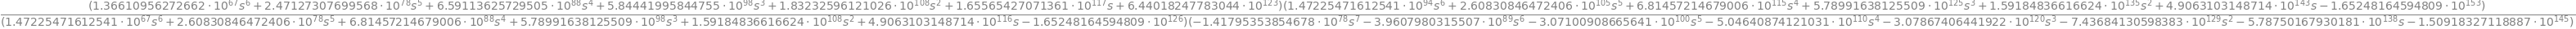

In [205]:
u1[sympify('v7')]/u1[sympify('I_Vdd')]

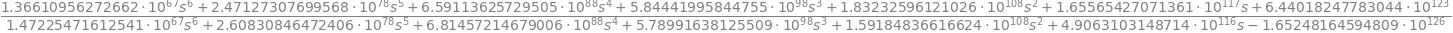

In [214]:
psr = u1[sympify('v7')]
psr

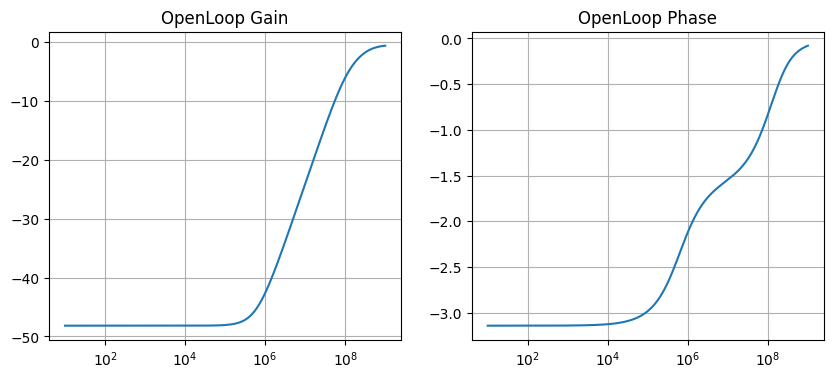

In [207]:
import numpy as np
import cmath as math
import matplotlib.pyplot as plt
s_sweep = np.logspace(1,9, num=400, base=10)
bode_data = []
phase_data = []
for idx, value in enumerate(s_sweep):
        PSRR = psr.subs({s:2*math.pi*value*1j})
        magnitude = 20*np.log10(float(np.abs(PSRR)))
        #print(float(np.abs(PSRR)))
        bode_data.append(magnitude)
        phase_data.append(math.phase(PSRR))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(s_sweep, bode_data)
ax1.set_xscale('log')
ax1.set_title('OpenLoop Gain')
ax1.grid()

ax2.plot(s_sweep, phase_data)
ax2.set_title('OpenLoop Phase')
ax2.set_xscale('log')
ax2.grid()

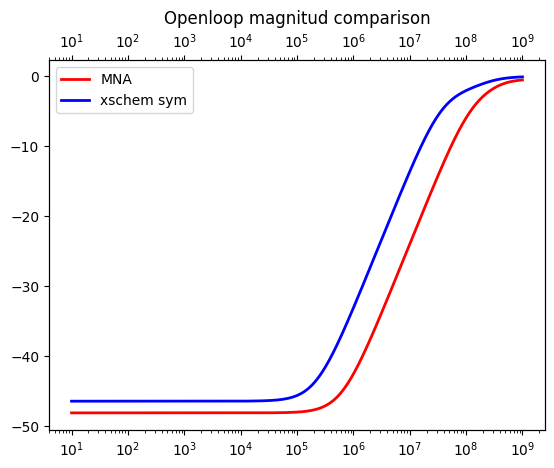

In [208]:
xschem_mag = [] 
xschem_phase = [] 
xschem_mag_x = []
xschem_phase_x = []

aux = 5
f = open('psr','r') 
for row in f: 
    row = row.split(' ')
    if(row[aux]==""):
        aux=6
    xschem_mag.append(float(row[2]))
    xschem_mag_x.append(float(row[1]))
    xschem_phase.append(float(row[aux])) 
    xschem_phase_x.append(float(row[4]))

f, ax = plt.subplots(1,1)
ax2 = ax.twiny()

l1 = ax.plot(s_sweep, bode_data ,color='r', label='MNA',linewidth=2)
ax.set_xscale('log')
l2= ax2.plot(xschem_mag_x, xschem_mag,color='b', label='xschem sym',linewidth=2)
ax2.set_xscale('log')
ax2.set_title('Openloop magnitud comparison')
ax.legend( handles=l1+l2 )

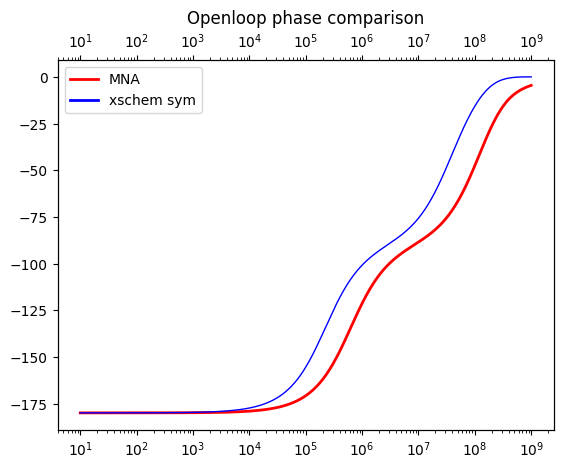

In [209]:
f, ax = plt.subplots(1,1)
ax2 = ax.twiny()
phase = np.asarray(phase_data)
ax.plot(s_sweep, np.divide(phase*180, np.pi),color='r', label='MNA',linewidth=2)
ax.set_xscale('log')
ax2.plot(xschem_phase_x, (xschem_phase),color='b', label='xschem sym',linewidth=1)
ax2.set_xscale('log')
ax2.set_title('Openloop phase comparison')
ax.legend( handles=l1+l2 )

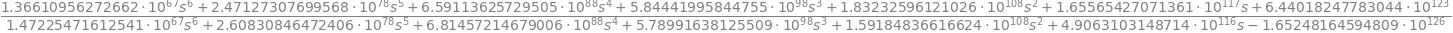

In [210]:
from sympy.physics.control.control_plots import bode_plot
from sympy.physics.control.lti import TransferFunctionMatrix, TransferFunction

tf = TransferFunction(*psr.as_numer_denom(), s)
tf

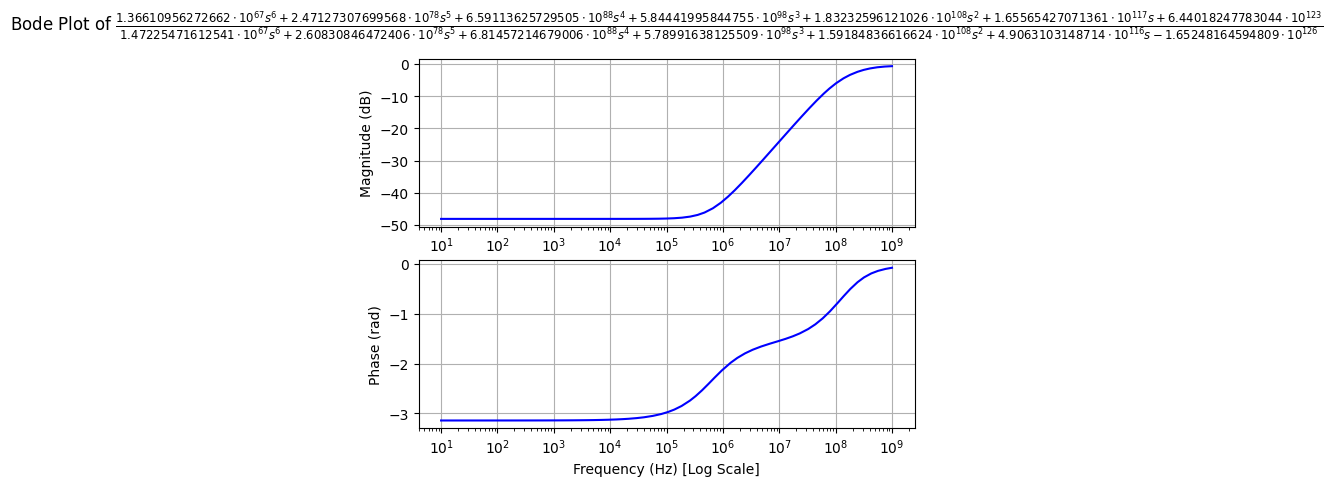

In [216]:
bode_plot(tf, initial_exp=1, final_exp=9, freq_unit='Hz')

# Test With GF180 

In [178]:
ota_name = "ota-ldo"
ota_netlist_path = "ldo_xschem/ota-ldo.spice"
netlist_output = "./ldo_xschem/OTA_op_netlist_gf180.spice"
op_output_data = "op_data_gf180"

template = template_generator(ota_name=ota_name,
                              output_file_path=op_output_data,
                              model_paths=[".include /home/jovyan/.volare/gf180mcuD/libs.tech/ngspice/design.ngspice", 
                                           ".lib /home/jovyan/.volare/gf180mcuD/libs.tech/ngspice/sm141064.ngspice typical",
                                           ".lib /home/jovyan/.volare/gf180mcuD/libs.tech/ngspice/sm141064.ngspice mimcap_statistical", 
                                           ".lib /home/jovyan/.volare/gf180mcuD/libs.tech/ngspice/sm141064.ngspice cap_mim"],
                              device_params_instantiation_model= "m0",
                              simulation_circuit = ["V1 V3V3 GND 3.3", 
                                                    "V2 net1 GND {CM_VOLTAGE}", 
                                                    "V3 INP net1 AC 1", 
                                                    "R1 net2 INM 10E6 m=1", 
                                                    "V4 OUT net2 {OUTPUT_VOLTAGE-CM_VOLTAGE}", 
                                                    "C3 INM GND 1 m=1", 
                                                    "I1 GND net3 3u", 
                                                    "C1 OUT GND 2.5p m=1"],
                              ota_netlist_path=ota_netlist_path,
                              netlist_output=netlist_output)

In [4]:
template.build()

subck
---------------------------------------------------
----- This is the netlist that gets simulated -----
---------------------------------------------------
* Lookup Table Generation *
.include /home/jovyan/.volare/gf180mcuD/libs.tech/ngspice/design.ngspice
.lib /home/jovyan/.volare/gf180mcuD/libs.tech/ngspice/sm141064.ngspice typical
.lib /home/jovyan/.volare/gf180mcuD/libs.tech/ngspice/sm141064.ngspice mimcap_statistical
.lib /home/jovyan/.volare/gf180mcuD/libs.tech/ngspice/sm141064.ngspice cap_mim
V1 V3V3 GND 3.3
V2 net1 GND {CM_VOLTAGE}
V3 INP net1 AC 1
R1 net2 INM 10E6 m=1
V4 OUT net2 {OUTPUT_VOLTAGE-CM_VOLTAGE}
C3 INM GND 1 m=1
I1 GND net3 3u
C1 OUT GND 2.5p m=1
X1 net3 V3V3 GND INM INP OUT ota-ldo

.options TEMP = 27
.options TNOM = 27
.param CM_VOLTAGE = 0.9
.param OUTPUT_VOLTAGE = 1
.control
save @m.x1.xm1.m0[gm]
save @m.x1.xm1.m0[gds]
save @m.x1.xm1.m0[cgs]
save @m.x1.xm1.m0[cgd]
save @m.x1.xm3.m0[gm]
save @m.x1.xm3.m0[gds]
save @m.x1.xm3.m0[cgs]
save @m.x1.xm3.m0[cgd]
s

In [5]:
print(f"run ngspice")
ngspice_command = f"ngspice -b {template.netlist_output}"
subprocess.run(ngspice_command, shell=True)

run ngspice

Note: No compatibility mode selected!


Circuit: * lookup table generation *

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1601
 meas ac phase_margin find phase_margin_val when vdb(out)=0 failed!

crossover_freq      =  0.000000e+00
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000


No. of Data Rows : 1
binary raw file "op_data_gf180"
Note: Simulation executed from .control section 


Note: v3: has no value, DC 0 assumed
Note: Starting dynamic gmin stepping
Note: Dynamic gmin stepping completed
    Command 'settype decibel out' is ignored

Warning from checkvalid: vector out is not available or has zero length.
Error: RHS "180/pi*cph(out)" invalid
    Command 'settype phase phase_val' is ignored

Error: no such vector as v(out).
Error: no such vector as phase_margin_val.
Error: no such vector as v(out).
Note: v3: has no value, DC 0 assumed
Note: Starting dynamic gmin stepping
Note: Dynamic gmin stepping completed


CompletedProcess(args='ngspice -b ./ldo_xschem/OTA_op_netlist_gf180.spice', returncode=0)